## Heart Disease Prediction By SANJAY N T Nov AI Batch
 

Heart disease is the leading cause of death for people of most racial and ethnic groups in the United States, including African American, American Indian, Alaska Native, Hispanic, and white men. For women from the Pacific Islands and Asian American, American Indian, Alaska Native, and Hispanic women, heart disease is second only to cancer.

Note: I have implemented few Machine Learning Models as for comparsion with the Deep Learning model 

## 1. Importing essential libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os

import warnings
warnings.filterwarnings('ignore')

## 2. Importing and understanding our dataset 

In [11]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [12]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [13]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [14]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


## 3. Exploratory Data Analysis

It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

1. age: The person's age in years
2. sex: The person's sex (1 = male, 0 = female)
3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
5. chol: The person's cholesterol measurement in mg/dl
6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. thalach: The person's maximum heart rate achieved
9. exang: Exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12. ca: The number of major vessels (0-3)
13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. target: Heart disease (0 = no, 1 = yes)

#### Description

In [16]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Let's understand our columns better:

In [18]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [19]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [20]:
dataset["target"].unique()

array([1, 0], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [13]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


## 4. Data Visualization

Now let see various visual representations of the data to understand more about relationship between various feautures.

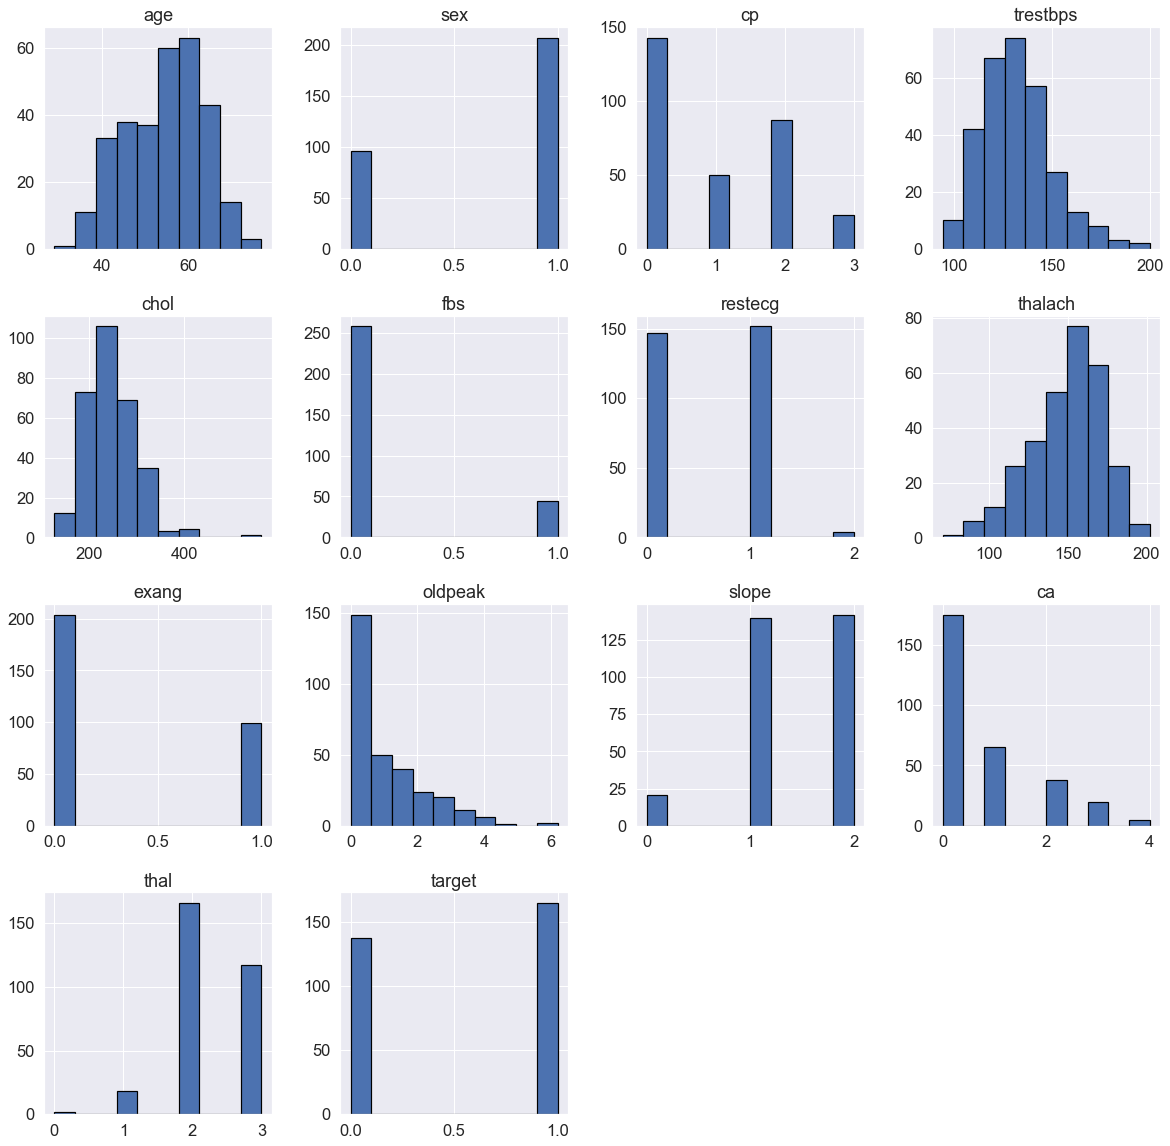

In [21]:
sns.set(font_scale=1.5)
dataset.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [29]:
categorical_values = []
for column in dataset.columns:
    print('==============================')
    print(f"{column} : {dataset[column].unique()}")
    if len(dataset[column].unique()) <= 10:
        categorical_values.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

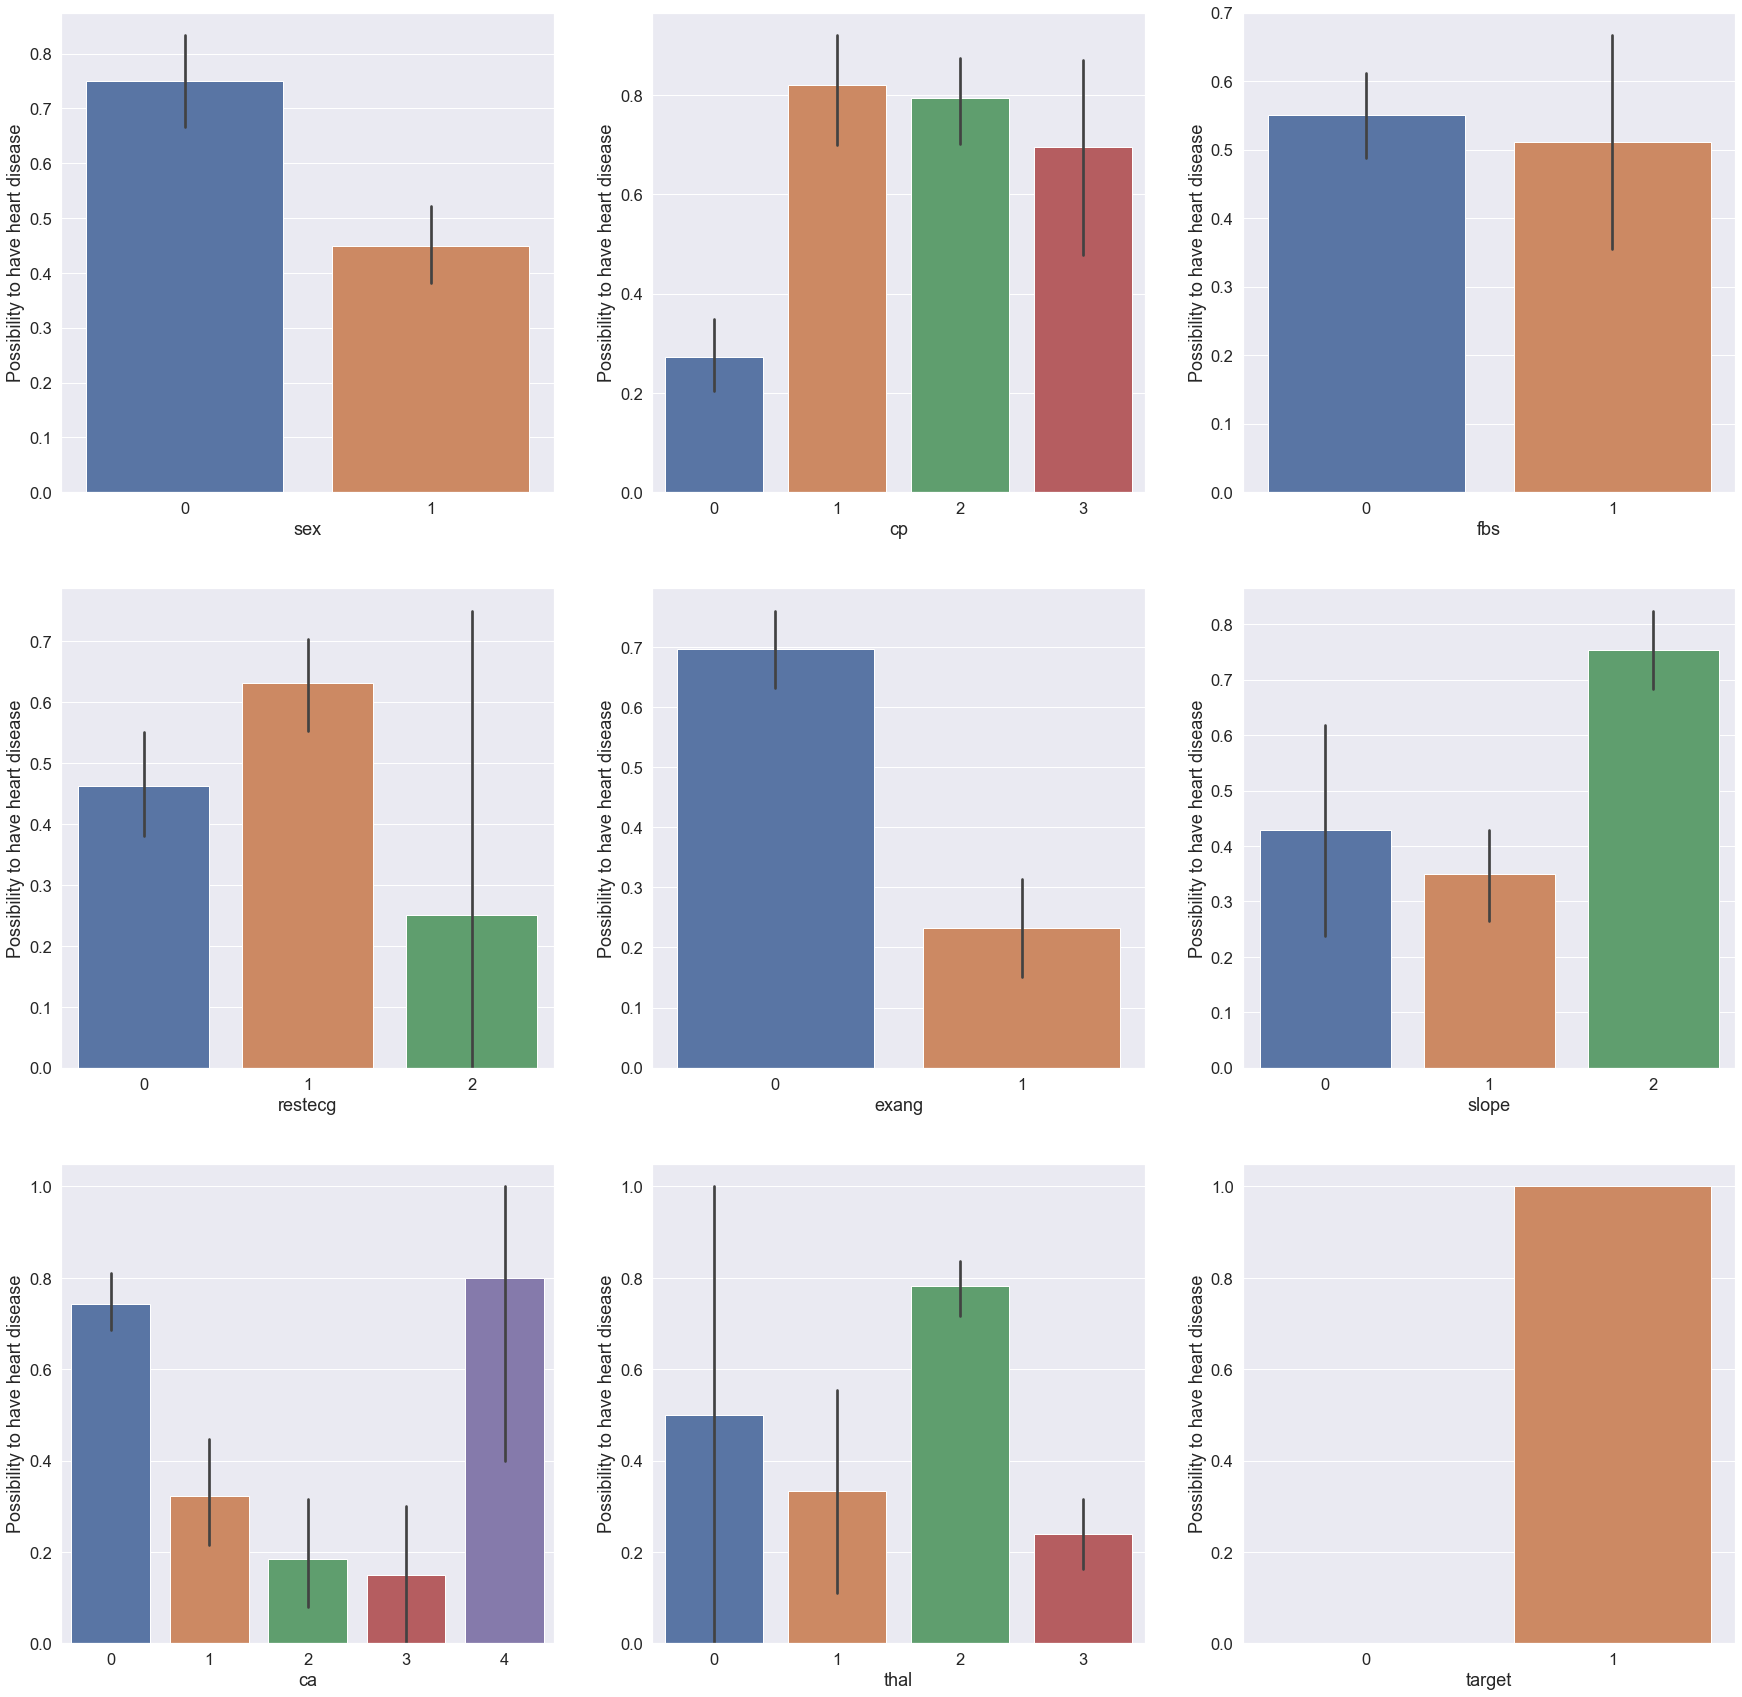

In [30]:
plt.figure(figsize=(30, 30))
for i, column in enumerate(categorical_values, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=f"{column}", y='target', data=dataset)
    plt.ylabel('Possibility to have heart disease')
    plt.xlabel(f'{column}')

<AxesSubplot:>

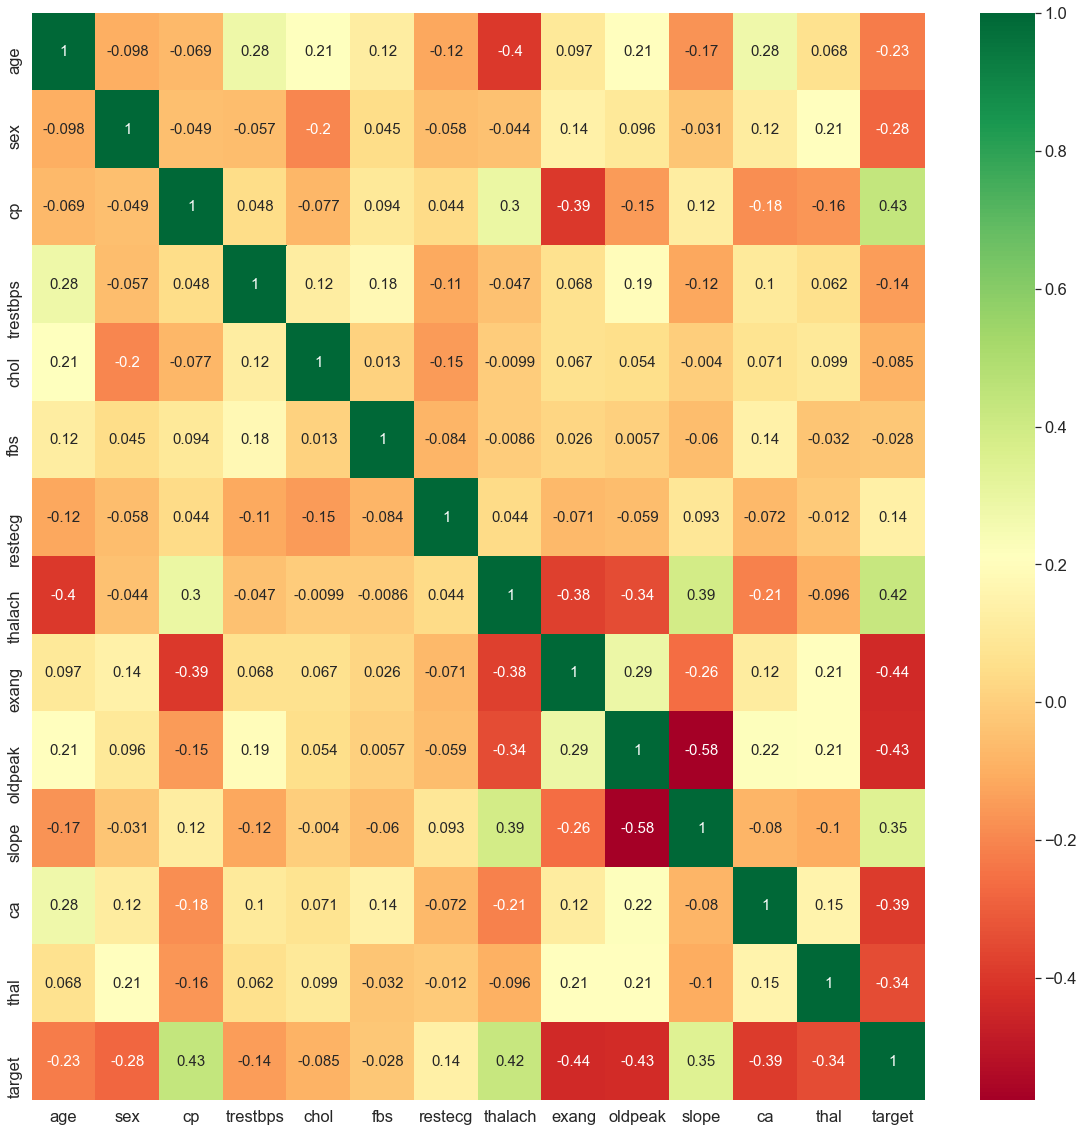

In [25]:
corr_matrix = dataset.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(20, 20))
sns.heatmap(dataset[top_corr_feature].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

## 5. Train Test split

In [31]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [32]:
X_train.shape

(242, 13)

In [33]:
X_test.shape

(61, 13)

In [34]:
Y_train.shape

(242,)

In [35]:
Y_test.shape

(61,)

## 6. Model Fitting

In [36]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [38]:
Y_pred_lr.shape

(61,)

In [39]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### K Nearest Neighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [47]:
Y_pred_knn.shape

(61,)

In [48]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


### Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [50]:
print(Y_pred_dt.shape)

(61,)


In [51]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [53]:
Y_pred_rf.shape

(61,)

In [55]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


### Neural Network

In [57]:
from keras.models import Sequential
from keras.layers import Dense

In [58]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [76]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3617 - accuracy: 0.8471
Epoch 2/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8430
Epoch 3/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.8430
Epoch 4/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3554 - accuracy: 0.8430
Epoch 5/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3585 - accuracy: 0.8430
Epoch 6/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3650 - accuracy: 0.8347
Epoch 7/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3520 - accuracy: 0.8512
Epoch 8/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3733 - accuracy: 0.8388
Epoch 9/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3652 - accuracy: 0.8388
Epoch 10/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.8430
Epoch 11/300
8/8 [===========

8/8 [==============================] - 0s 2ms/step - loss: 0.3555 - accuracy: 0.8430
Epoch 85/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8430
Epoch 86/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3655 - accuracy: 0.8388
Epoch 87/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3653 - accuracy: 0.8388
Epoch 88/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3927 - accuracy: 0.8223
Epoch 89/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3612 - accuracy: 0.8471
Epoch 90/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8430
Epoch 91/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8306
Epoch 92/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3751 - accuracy: 0.8388
Epoch 93/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3756 - accuracy: 0.8264
Epoch 94/300
8/8 [===============

8/8 [==============================] - 0s 3ms/step - loss: 0.3618 - accuracy: 0.8306
Epoch 167/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.8388
Epoch 168/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3551 - accuracy: 0.8430
Epoch 169/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3558 - accuracy: 0.8430
Epoch 170/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3616 - accuracy: 0.8264
Epoch 171/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.8430
Epoch 172/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3616 - accuracy: 0.8306
Epoch 173/300
8/8 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8017
Epoch 174/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3944 - accuracy: 0.8264
Epoch 175/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3720 - accuracy: 0.8388
Epoch 176/300
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.8471
Epoch 249/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8471
Epoch 250/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3507 - accuracy: 0.8430
Epoch 251/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8388
Epoch 252/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.8388
Epoch 253/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.8347
Epoch 254/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8471
Epoch 255/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3691 - accuracy: 0.8264
Epoch 256/300
8/8 [==============================] - 0s 1ms/step - loss: 0.3749 - accuracy: 0.8512
Epoch 257/300
8/8 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.8430
Epoch 258/300
8/8 [=====

In [77]:
Y_pred_nn = model.predict(X_test)

In [78]:
Y_pred_nn.shape

(61, 1)

In [79]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [80]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %") 

The accuracy score achieved using Neural Network is: 83.61 %


## VI. Output final score

In [81]:
scores = [score_lr,score_knn,score_dt,score_rf,score_nn]
algorithms = ["Logistic Regression","K-Nearest Neighbors","Decision Tree","Random Forest","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using Neural Network is: 83.61 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

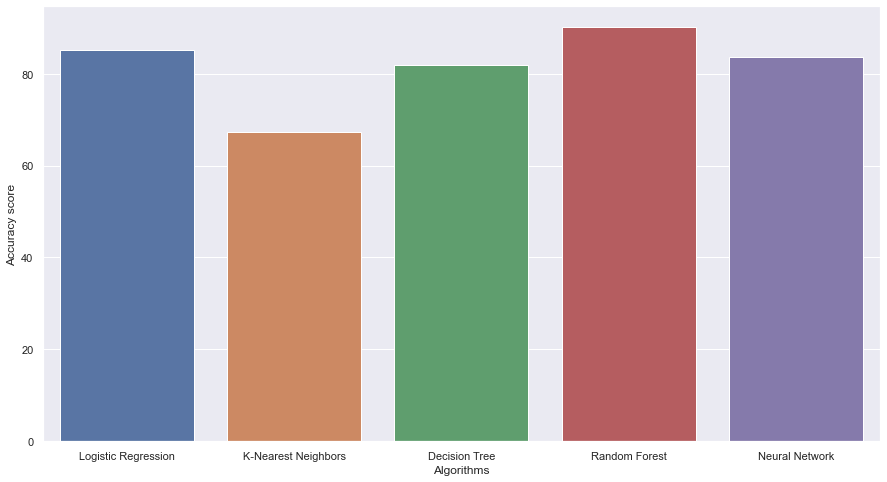

In [82]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

## Conclusion

The Neural Network model has a accuracy ok 83.61% 